In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Gray Image')

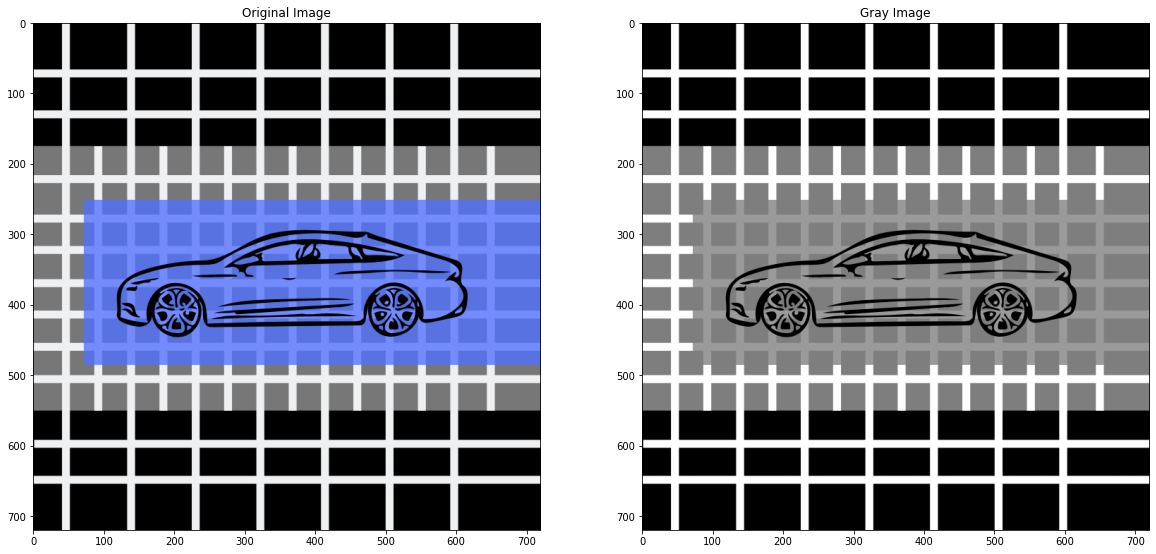

In [3]:
image = cv2.imread("./data/images/Quiz-1-Assets.png")
imageCopy = image.copy()
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(121)
plt.imshow(image[:, :, ::-1])
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray)
plt.title("Gray Image")

In [4]:
imageB = image[:, :, 0]
imageG = image[:, :, 1]
imageR = image[:, :, 2]

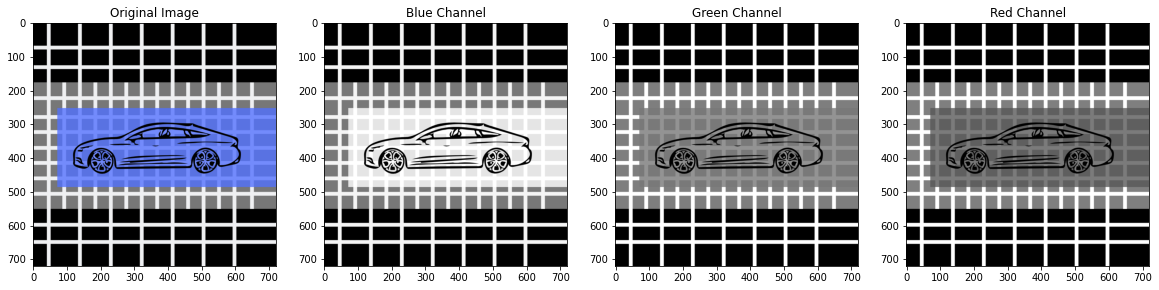

In [5]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

In [6]:
def thresholdingTrials(src, thresh, maxValue):
    # Binary Thresholding 
    th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
    # Inverse Binary Thresholding 
    th, dst_bin_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)
    # Truncate Thresholding 
    th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)
    # Threshold to Zero 
    th, dst_to_zero = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)
    # Inverted Threshold to Zero
    th, dst_to_zero_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)
    print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
    plt.figure(figsize=[20,12])
#     plt.subplot(231);plt.imshow(src, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
#     plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
#     plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");
#     plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Truncate");
#     plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero");
#     plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero Inverse");
    plt.subplot(231);plt.imshow(src);plt.title("Original Image");
    plt.subplot(232);plt.imshow(dst_bin);plt.title("Threshold Binary");
    plt.subplot(233);plt.imshow(dst_bin_inv);plt.title("Threshold Binary Inverse");
    plt.subplot(234);plt.imshow(dst_trunc);plt.title("Threshold Truncate");
    plt.subplot(235);plt.imshow(dst_to_zero);plt.title("Threshold To Zero");
    plt.subplot(236);plt.imshow(dst_to_zero_inv);plt.title("Threshold To Zero Inverse");

In [12]:
thresh = 100
maxValue = 150
# thresholdingTrials(imageB, thresh, maxValue)

In [13]:
# thresholdingTrials(imageG, thresh, maxValue)

In [14]:
# thresholdingTrials(imageR, thresh, maxValue)

Threshold Value = 100, Max Value = 150


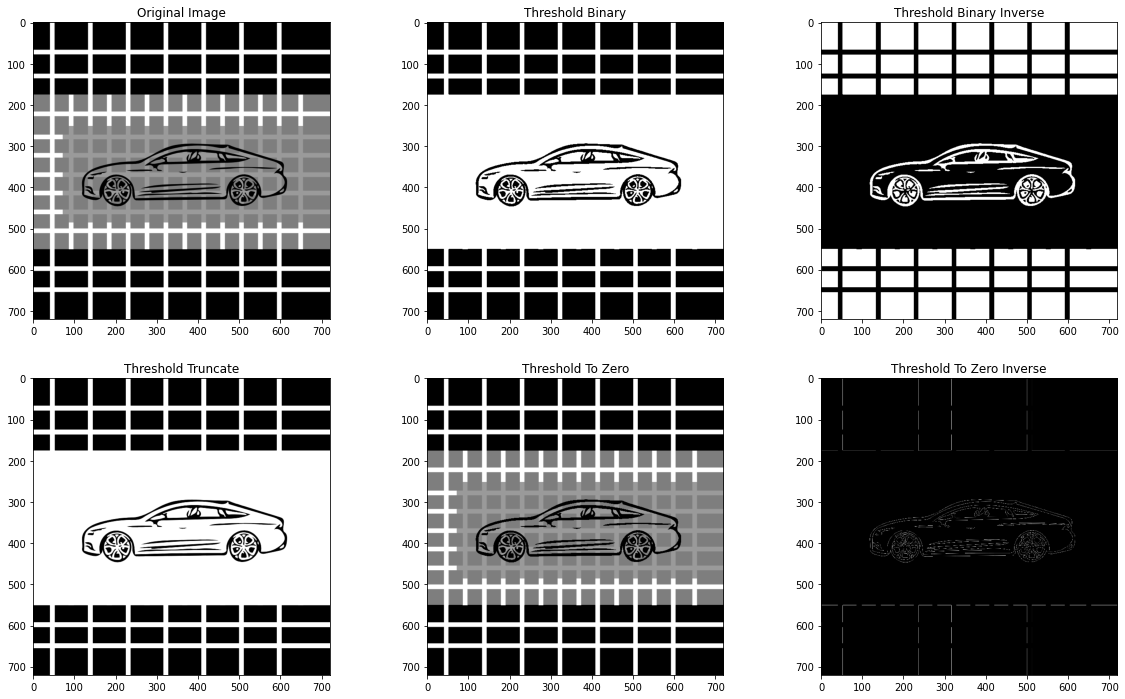

In [15]:
thresholdingTrials(imageGray, thresh, maxValue)

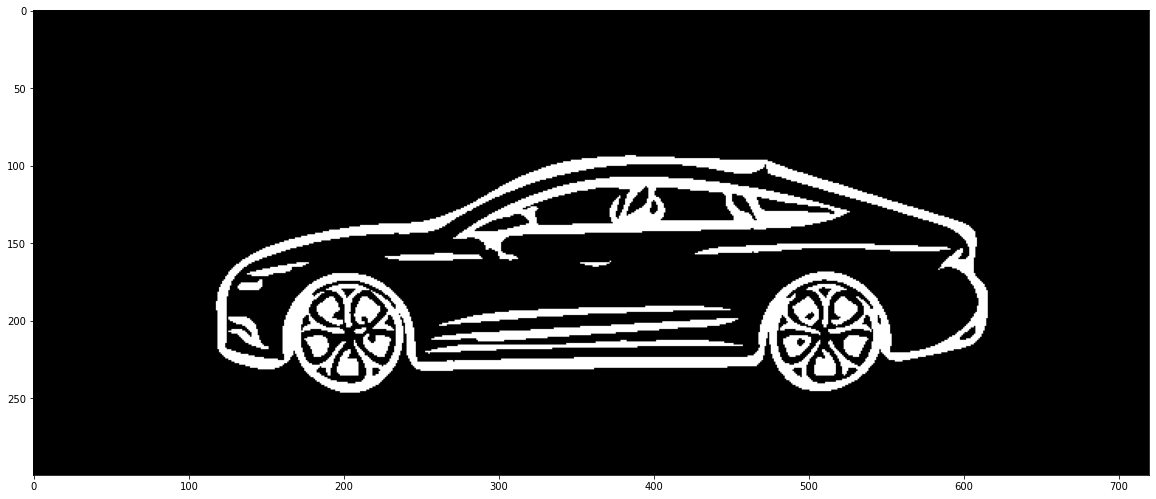

In [18]:
th, imageThresholded = cv2.threshold(imageGray[200:500, :], 100, 150, cv2.THRESH_BINARY_INV)
plt.imshow(imageThresholded)

In [ ]:
# contours, heirarchy = cv2.findContours(imageGray[200:500, :], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# print("Number of countours found = {}".format(len(contours)))
# # print("\nHeirarchy : \n{}".format(heirarchy))

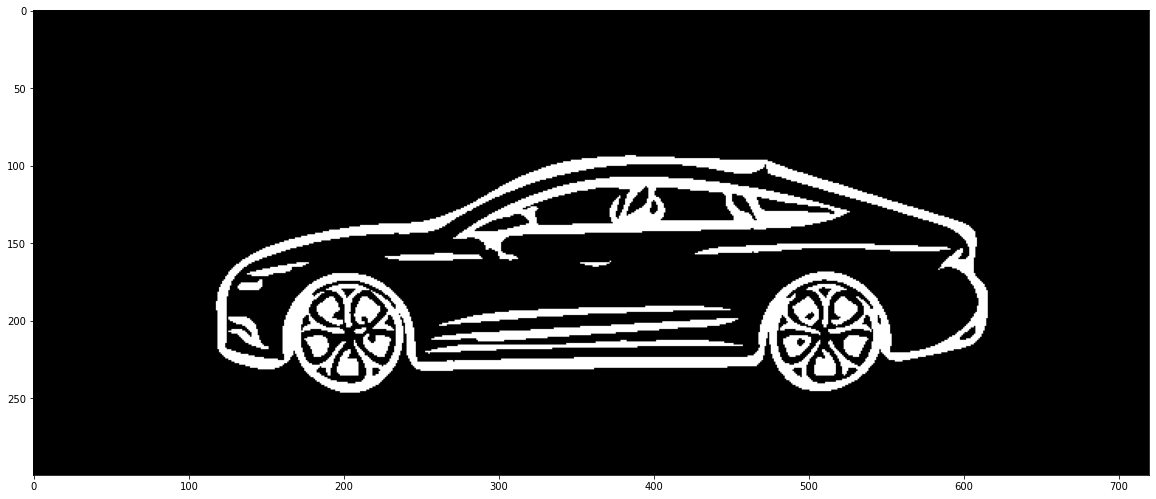

In [21]:
# cv2.drawContours(image[200:500, :], contours, -1, (0, 255, 0), 3)
# plt.imshow(image[:, :, ::-1])
imageThreshCopy = imageThresholded.copy()
plt.imshow(imageThreshCopy)

Number of contours found = 1


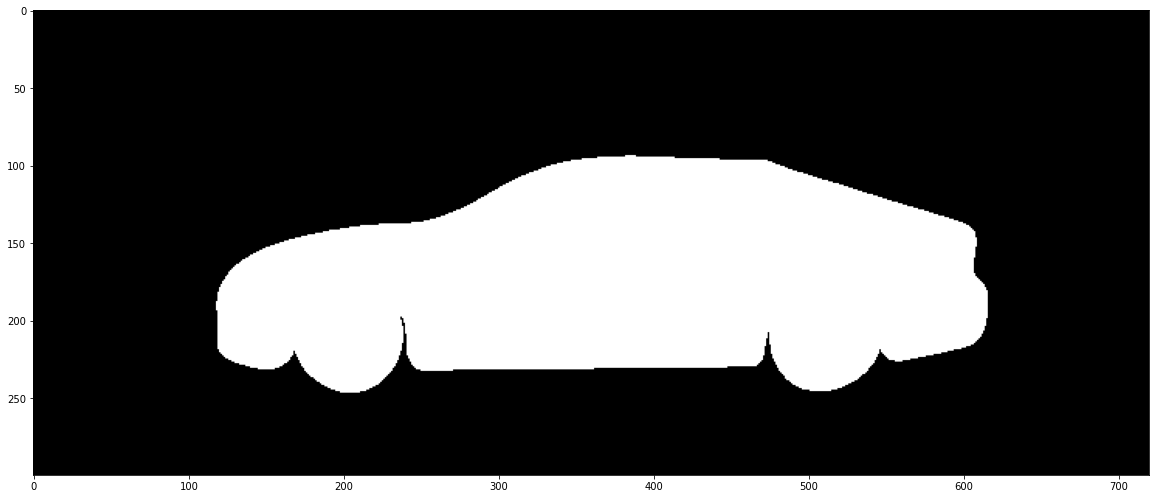

In [23]:
contours, heirarchy = cv2.findContours(imageThresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours found = {}".format(len(contours)))
image = imageCopy.copy()
# cv2.drawContours(image[200:500, :], contours, -1, (255, 0, 0), 3)
cv2.fillPoly(imageThreshCopy, pts = contours, color = (255, 255, 255))
plt.imshow(imageThreshCopy)

### Morphological Gradient
Now apply [Morphological Gradient](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) to get the outer boundary and subtract the interiors.

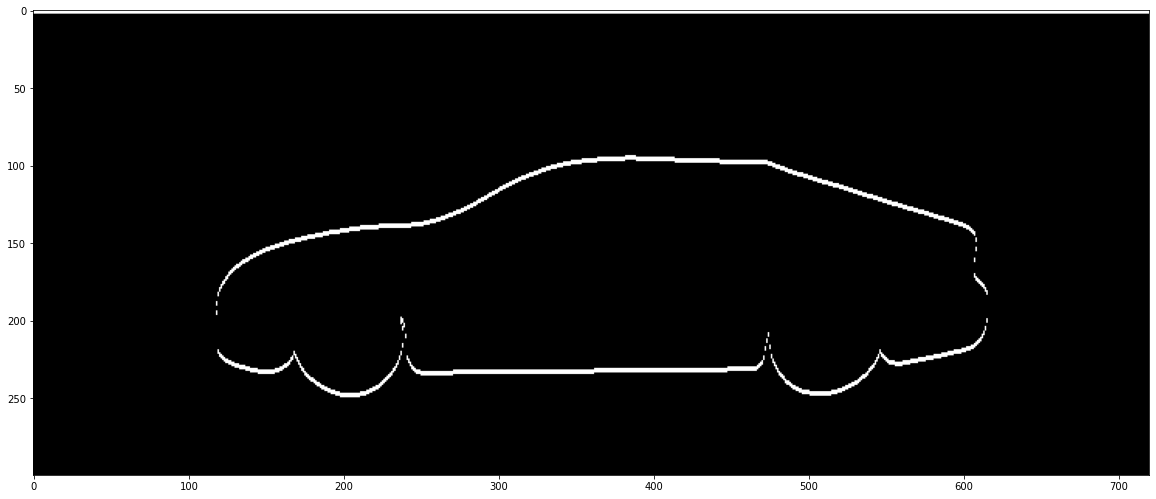

In [30]:
imageGradient = cv2.morphologyEx(imageThreshCopy, cv2.MORPH_GRADIENT, (200,200), iterations = 3, \
                                 borderType =  cv2.BORDER_CONSTANT, borderValue = 3000)
plt.imshow(imageGradient)

In [49]:
def dilationTrials(src, kSize, kShape, iterations):
    kernel = cv2.getStructuringElement(kShape, kSize)
    image_dia = cv2.dilate(src, kernel, iterations = iterations)
    plt.figure(figsize = [15, 15])
    plt.subplot(121); plt.imshow(src); plt.title("Original Image")
    plt.subplot(122); plt.imshow(image_dia); plt.title("Dilated Image")
    return image_dia

In [57]:
def erosionTrials(src, kSize, kShape, iterations):
    kernel = cv2.getStructuringElement(kShape, kSize)
    image_ero = cv2.erode(src, kernel, iterations = iterations)
    plt.figure(figsize = [15, 15])
    plt.subplot(121); plt.imshow(src); plt.title("Original Image")
    plt.subplot(122); plt.imshow(image_ero); plt.title("Eroded Image")
    return image_ero

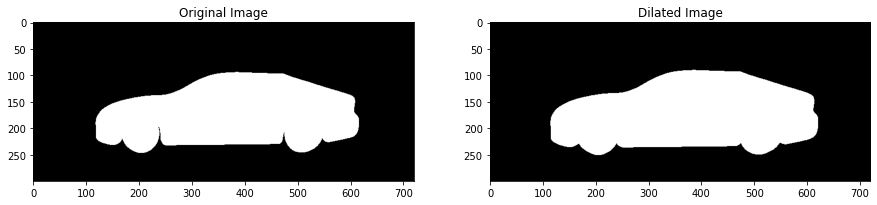

In [58]:
kSize = (5, 5)
kShape = cv2.MORPH_ELLIPSE
iterations = 2
imageDilated = dilationTrials(imageThreshCopy, kSize, kShape, iterations);

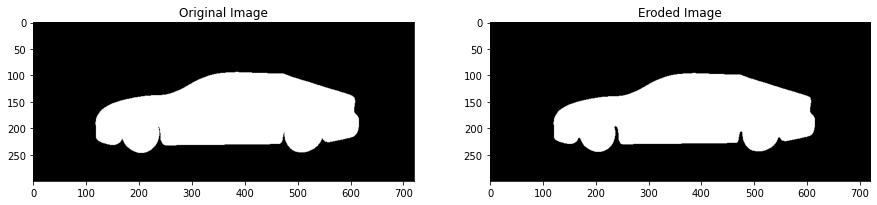

In [59]:
kSize = (3, 3)
kShape = cv2.MORPH_ELLIPSE
iterations = 2
imageEroded = erosionTrials(imageThreshCopy, kSize, kShape, iterations);

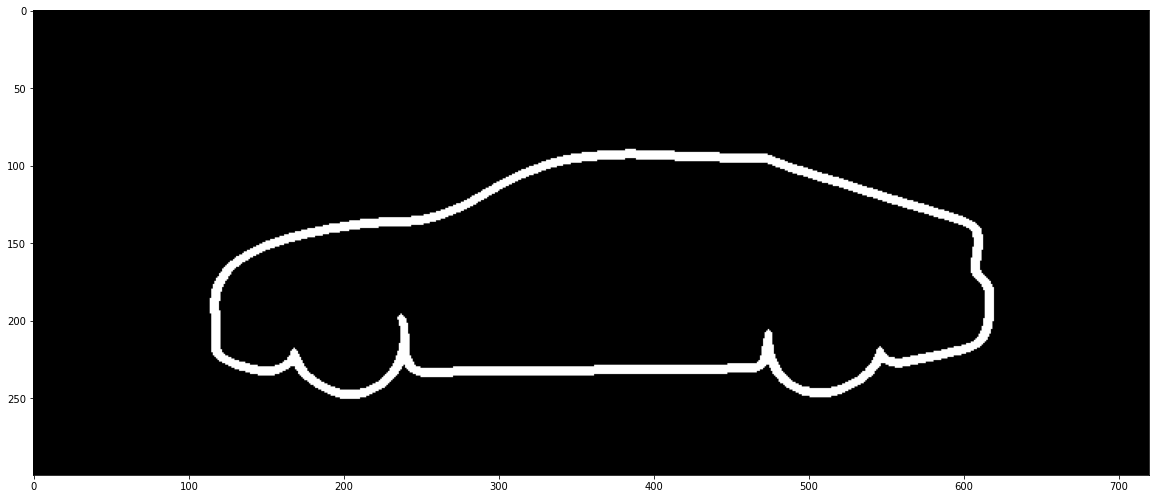

In [60]:
imageGrad = cv2.subtract(imageDilated, imageEroded)
plt.imshow(imageGrad)